In [1]:
import os
import six
import glob
import pickle

import numpy as np
import pandas as pd

import p2pspatial
import pulse2percept.utils as p2pu

from sklearn.base import clone
import sklearn.metrics as sklm

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2018-04-02 12:40:47,703 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
def load_data(pickle_files, verbose=True):
    data = []
    for pickle_file in pickle_files:
        if verbose:
            print('- Processing %s' % pickle_file)
        y, y_pred, best_params, specifics = pickle.load(open(pickle_file, 'rb'))
        assert specifics['avg_img']
        best_cost = 0
        r2_scores = {}
        for col in y_pred.drop(columns=['electrode', 'image']).columns:
            yt = np.array(y.loc[:, col], dtype=float)
            yp = np.array(y_pred.loc[:, col], dtype=float)
            if verbose and np.any(np.isnan(yp)):
                print('  - Found isnan', col)
            r2_scores['r2_' + col] = sklm.r2_score(yt, np.nan_to_num(yp))
            best_cost += 1 - r2_scores['r2_' + col]
        row = {
            'subject': specifics['subject'],
            'model': specifics['modelname'],
            'exetime': specifics['exetime'],
            'adjust_bias': specifics['adjust_bias'],
            'best_params': best_params,
            'best_cost': best_cost,
            'n_samples': len(yt),
            'filepath': os.path.dirname(pickle_file),
            'filename': os.path.basename(pickle_file)
        }
        row.update(r2_scores)
        data.append(row)
    return pd.DataFrame(data)

In [3]:
results_dir = '../../results/shapefit/'
pickle_files = np.sort(glob.glob(os.path.join(results_dir, '*.pickle')))
pickle_files

array([ '../../results/shapefit/12-005-A-shapefit-swarm_2018-04-01_22-07-02.pickle',
       '../../results/shapefit/12-005-A-shapefit-swarm_2018-04-01_22-51-31.pickle',
       '../../results/shapefit/12-005-B-shapefit-swarm_2018-04-01_22-35-11.pickle',
       '../../results/shapefit/12-005-B-shapefit-swarm_2018-04-01_23-14-42.pickle',
       '../../results/shapefit/12-005-C-shapefit-swarm_2018-04-01_20-49-09.pickle',
       '../../results/shapefit/12-005-C-shapefit-swarm_2018-04-02_00-07-59.pickle',
       '../../results/shapefit/51-009-A-shapefit-swarm_2018-04-01_22-14-18.pickle',
       '../../results/shapefit/51-009-A-shapefit-swarm_2018-04-01_23-00-10.pickle',
       '../../results/shapefit/51-009-B-shapefit-swarm_2018-04-01_22-45-54.pickle',
       '../../results/shapefit/51-009-B-shapefit-swarm_2018-04-01_23-37-57.pickle',
       '../../results/shapefit/51-009-C-shapefit-swarm_2018-04-01_20-49-35.pickle',
       '../../results/shapefit/52-001-A-shapefit-swarm_2018-04-01_22-11-45.

In [4]:
subjects = ['12-005', '51-009', '52-001', 'TB']
models = ['A', 'C', 'D2', 'E2', 'F2']
assert_params = {
    'amplitude': 2.0,
}
rootfolder = os.path.join(os.environ['SECOND_SIGHT_DATA'], 'shape')

In [5]:
data = load_data(pickle_files, verbose=False)
data

,adjust_bias,best_cost,best_params,exetime,filename,filepath,model,n_samples,r2_area,r2_compactness,r2_eccentricity,r2_orientation,subject
0,False,10.609067,{'rho': 65.2974021486},137.855020,12-005-A-shapefit-swarm_2018-04-01_22-07-02.pi...,../../results/shapefit,A,22,-4.370966,-0.534013,-0.809130,-0.894958,12-005
1,True,10.281662,{'rho': 57.1798278377},120.758101,12-005-A-shapefit-swarm_2018-04-01_22-51-31.pi...,../../results/shapefit,A,22,-3.429565,-0.554617,-0.364652,-1.932829,12-005
2,False,6.017300,"{'rho': 525.958713594, 'implant_x': 365.635811...",263.436795,12-005-B-shapefit-swarm_2018-04-01_22-35-11.pi...,../../results/shapefit,B,22,-0.220306,-0.438097,-0.710613,-0.648284,12-005
3,True,6.082335,"{'rho': 766.811633219, 'implant_x': 311.142372...",536.132694,12-005-B-shapefit-swarm_2018-04-01_23-14-42.pi...,../../results/shapefit,B,22,-0.008720,-0.454338,-0.744421,-0.874856,12-005
4,True,5.498937,"{'loc_od_x': 14.068363342, 'axlambda': 3000.0,...",4719.473602,12-005-C-shapefit-swarm_2018-04-01_20-49-09.pi...,../../results/shapefit,C,22,-0.722526,-0.264992,-0.631053,0.119634,12-005
5,True,5.565156,"{'axlambda': 1531.60424315, 'loc_od_x': 14.047...",2401.603688,12-005-C-shapefit-swarm_2018-04-02_00-07-59.pi...,../../results/shapefit,C,22,-0.593521,-0.135059,-0.791850,-0.044725,12-005
6,False,60.637674,{'rho': 64.9268946286},1249.300554,51-009-A-shapefit-swarm_2018-04-01_22-14-18.pi...,../../results/shapefit,A,18,-1.277026,-2.490554,-52.874134,0.004040,51-009
7,True,140.960679,{'rho': 50.0},859.426418,51-009-A-shapefit-swarm_2018-04-01_23-00-10.pi...,../../results/shapefit,A,18,-1.325049,-1.746502,-133.146485,-0.742642,51-009
8,False,25.397958,"{'implant_y': -341.337051315, 'implant_x': 357...",333.764437,51-009-B-shapefit-swarm_2018-04-01_22-45-54.pi...,../../results/shapefit,B,18,-0.231965,-2.208202,-18.616870,-0.340922,51-009
9,True,25.582479,"{'implant_y': -377.799979689, 'implant_x': 404...",201.652509,51-009-B-shapefit-swarm_2018-04-01_23-37-57.pi...,../../results/shapefit,B,18,0.223331,-1.360877,-20.109363,-0.335569,51-009


In [6]:
print('Average execution time:')
data.groupby('model').mean()

Average execution time:


,adjust_bias,best_cost,exetime,n_samples,r2_area,r2_compactness,r2_eccentricity,r2_orientation
model,,,,,,,,
A,0.500000,45.418009,380.459623,20.000000,-2.850084,-1.653471,-35.461524,-1.452930
B,0.428571,12.961034,360.493120,21.142857,-0.312560,-0.985210,-7.076682,-0.586582
C,0.666667,8.370160,10140.671588,19.000000,-0.485451,-0.213554,-3.683309,0.012155
D,0.333333,4.821128,7717.705284,28.000000,-0.561723,-0.166976,-0.126864,0.034435


In [7]:
print('Best scores:')
data.drop(columns=['filepath', 'exetime', 'n_samples']).groupby(['subject', 'model', 'adjust_bias']).min()

Best scores:


best_cost  \
subject model adjust_bias               
12-005  A     False         10.609067   
              True          10.281662   
        B     False          6.017300   
              True           6.082335   
        C     True           5.498937   
51-009  A     False         60.637674   
              True         140.960679   
        B     False         25.397958   
              True          25.582479   
        C     True          24.502212   
52-001  A     False         12.108417   
              True          14.802569   
        B     False          6.153389   
              True           7.819060   
        C     False          4.802862   
        D     False          4.549709   
              True           4.751663   
TB      A     False         60.391938   
              True          53.552065   
        B     False         13.674720   
        C     False          6.563713   
              True           3.288080   

                                                                    filename  \
subject model adjust_bias                                                      
12-005  A     False        12-005-A-shapefit-swarm_2018-04-01_22-07-02.pi...   
              True         12-005-A-shapefit-swarm_2018-04-01_22-51-31.pi...   
        B     False        12-005-B-shapefit-swarm_2018-04-01_22-35-11.pi...   
              True         12-005-B-shapefit-swarm_2018-04-01_23-14-42.pi...   
        C     True         12-005-C-shapefit-swarm_2018-04-01_20-49-09.pi...   
51-009  A     False        51-009-A-shapefit-swarm_2018-04-01_22-14-18.pi...   
              True         51-009-A-shapefit-swarm_2018-04-01_23-00-10.pi...   
        B     False        51-009-B-shapefit-swarm_2018-04-01_22-45-54.pi...   
              True         51-009-B-shapefit-swarm_2018-04-01_23-37-57.pi...   
        C     True         51-009-C-shapefit-swarm_2018-04-01_20-49-35.pi...   
52-001  A     False        52-001-A-shapefit-swarm_2018-04-01_22-11-45.pi...   
              True         52-001-A-shapefit-swarm_2018-04-01_22-55-11.pi...   
        B     False        52-001-B-shapefit-swarm_2018-04-01_22-41-37.pi...   
              True         52-001-B-shapefit-swarm_2018-04-01_23-24-03.pi...   
        C     False        52-001-C-shapefit-swarm_2018-04-01_20-46-57.pi...   
        D     False        52-001-D-shapefit-swarm_2018-04-02_03-58-35.pi...   
              True         52-001-D-shapefit-swarm_2018-04-02_04-00-31.pi...   
TB      A     False           TB-A-shapefit-swarm_2018-04-01_22-09-23.pickle   
              True            TB-A-shapefit-swarm_2018-04-01_22-53-36.pickle   
        B     False           TB-B-shapefit-swarm_2018-04-01_22-39-49.pickle   
        C     False           TB-C-shapefit-swarm_2018-04-01_21-35-10.pickle   
              True            TB-C-shapefit-swarm_2018-04-01_20-48-43.pickle   

                            r2_area  r2_compactness  r2_eccentricity  \
subject model adjust_bias                                              
12-005  A     False       -4.370966       -0.534013        -0.809130   
              True        -3.429565       -0.554617        -0.364652   
        B     False       -0.220306       -0.438097        -0.710613   
              True        -0.008720       -0.454338        -0.744421   
        C     True        -0.722526       -0.264992        -0.791850   
51-009  A     False       -1.277026       -2.490554       -52.874134   
              True        -1.325049       -1.746502      -133.146485   
        B     False       -0.231965       -2.208202       -18.616870   
              True         0.223331       -1.360877       -20.109363   
        C     True         0.319747       -0.167577       -20.818935   
52-001  A     False       -3.926150       -0.197181        -2.767300   
              True        -3.895988       -0.198675        -6.912347   
        B     False       -0.063161       -0.185708        -1.350379   
              True         0.023619       

In [8]:
plot_files = data.groupby(['subject', 'model', 'adjust_bias'], as_index=False).min()

In [9]:
y, _, _, _ = pickle.load(open(os.path.join(*plot_files.loc[0, ['filepath', 'filename']]), 'rb'))
columns = y.drop(columns=['electrode', 'image']).columns

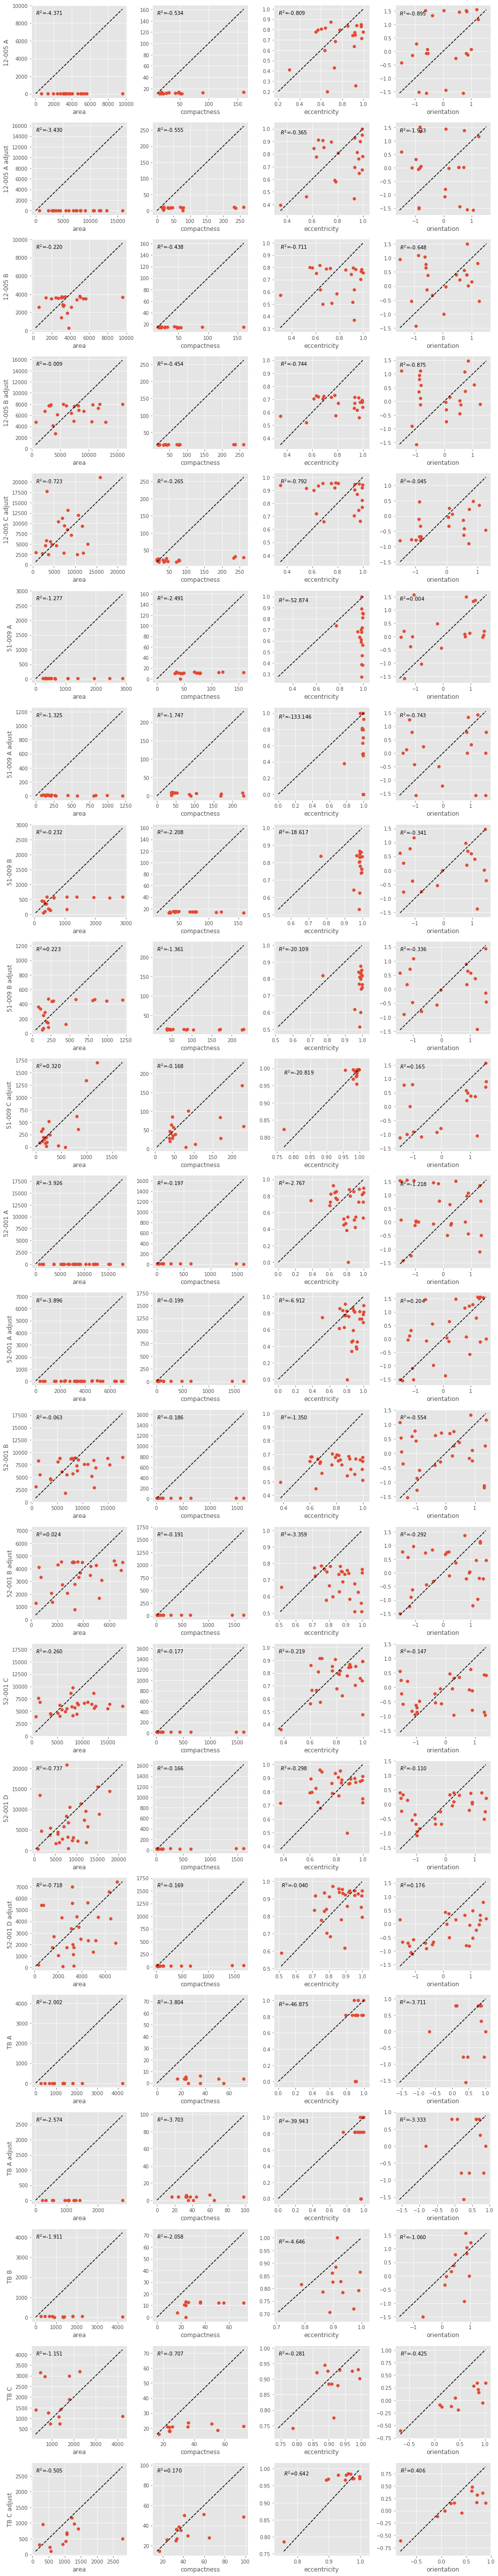

In [10]:
fig, axes = plt.subplots(ncols=len(columns), nrows=len(plot_files), figsize=(14, 3 * len(pickle_files)))
for (_, row), axrow in zip(plot_files.iterrows(), axes):
    y, y_pred, _, _ = pickle.load(open(os.path.join(*row[['filepath', 'filename']]), 'rb'))
    for col, ax in zip(columns, axrow):
        ax.scatter(y[col], y_pred[col])
        minval = np.minimum(y[col].min(), y_pred[col].min())
        maxval = np.maximum(y[col].max(), y_pred[col].max())
        ax.plot([minval, maxval], [minval, maxval], 'k--')
        ax.set_xlabel(col)
        ax.text(minval, maxval, "$R^2$=%.3f" % float(row['r2_' + col]), va='top')
    axrow[0].set_ylabel('%s %s %s' % (row['subject'], row['model'],
                                      "adjust" if row['adjust_bias'] else ""))
fig.tight_layout()